In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [196]:
from google.colab import drive
drive.mount('ruta_del_dataset')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Functions

In [197]:
def missing_percentage(df, columns):
    results = {}
    for column in columns:
        percentage = df[column].isnull().mean() * 100
        results[column] = percentage
    return results

In [198]:
def frequency_encoding(column):
    frequency = df_cleaned[column].value_counts() / len(df_cleaned)
    df_cleaned[column] = df_cleaned[column].map(frequency)

## EDA

In [199]:
df=pd.read_csv('/content/drive/MyDrive/Programación/Python/Kaggle Datasets /Amazon_Cell_Phones.csv')

In [200]:
df.head()

,ID,product_name,product_link,image_link,Price (Dollar),discount_percentage,price_before_discount,rating_out_of_5,number_of_ratings,brand,operating_system,RAM (GB),CPU,Storage (GB),screen_size (Inches),cellular_technology,model_name,cpu_model,available_colors
0,1,"Apple iPhone XR, 64GB, Black - Unlocked (Renewed)",https://www.amazon.com/Apple-iPhone-XR-Fully-U...,https://m.media-amazon.com/images/I/717KHGCJ6e...,168.39,5.93,179.0,4.4,64918.0,Apple,iOS 12,3.0,NaN,64.0,6.10,"LTE, CDMA, EV-DO, UMTS, HSPA, HSDPA, GSM, EDGE",iPhone XR,NaN,"Black, Blue, Coral, Red, White, Yellow"
1,2,"Apple iPhone 11, 64GB, Black - Unlocked (Renewed)",https://www.amazon.com/Apple-iPhone-11-64GB-Bl...,https://m.media-amazon.com/images/I/612kg3rGyY...,230.00,0.00,NaN,4.2,52613.0,Apple,iOS 16,4.0,NaN,64.0,6.10,4G,iPhone 11,NaN,"Black, Green, Purple, Red, White, Yellow"
2,3,"Apple iPhone 12, 64GB, Black - Fully Unlocked ...",https://www.amazon.com/Apple-iPhone-12-64GB-Bl...,https://m.media-amazon.com/images/I/41bIlvE1rd...,287.00,0.00,NaN,4.1,25403.0,Apple,iOS 16,4.0,NaN,64.0,6.10,"5G, 4G LTE",iPhone 12,NaN,"(Product)Red, Black, Blue, Green, Purple, Red,..."
3,4,"OnePlus Nord CE 2,​ 5G Unlocked Android Smartp...",https://www.amazon.com/OnePlus-Unlocked-Androi...,https://m.media-amazon.com/images/I/61+Q6Rh3OQ...,329.99,0.00,NaN,4.3,25133.0,OnePlus,Android 12.0,8.0,NaN,128.0,6.43,5G,Nord CE 2,Others,NaN
4,5,"Apple iPhone XS, US Version, 64GB, Space Gray ...",https://www.amazon.com/Apple-iPhone-64GB-Space...,https://m.media-amazon.com/images/I/51I7GPdU6L...,182.00,0.00,NaN,4.2,21859.0,Apple,iOS 12,NaN,NaN,64.0,5.80,"GSM, CDMA, HSPA, EVDO, LTE, HSDPA",iPhone XS,NaN,"GOLD, Gold, SILVER, Silver, Space Gray"


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3351 non-null   int64  
 1   product_name           3351 non-null   object 
 2   product_link           3351 non-null   object 
 3   image_link             3351 non-null   object 
 4   Price (Dollar)         2347 non-null   float64
 5   discount_percentage    3351 non-null   float64
 6   price_before_discount  569 non-null    float64
 7   rating_out_of_5        3117 non-null   float64
 8   number_of_ratings      3117 non-null   float64
 9   brand                  3347 non-null   object 
 10  operating_system       2947 non-null   object 
 11  RAM (GB)               1894 non-null   float64
 12  CPU                    1222 non-null   object 
 13  Storage (GB)           3256 non-null   float64
 14  screen_size (Inches)   3163 non-null   float64
 15  cell

In [202]:
df.describe()

,ID,Price (Dollar),discount_percentage,price_before_discount,rating_out_of_5,number_of_ratings,RAM (GB),Storage (GB),screen_size (Inches)
count,3351.000000,2347.000000,3351.000000,569.000000,3117.000000,3117.000000,1894.000000,3256.000000,3163.000000
mean,1676.000000,278.421172,3.476780,359.813708,3.837632,401.905679,13.060090,125.590943,6.058097
std,967.494703,271.801032,10.419117,358.907338,0.708294,2026.345519,42.152928,155.421699,5.503657
min,1.000000,4.890000,0.000000,15.890000,1.000000,1.000000,0.000000,0.000000,0.393701
25%,838.500000,92.770000,0.000000,119.990000,3.600000,11.000000,4.000000,16.000000,5.500000
50%,1676.000000,185.990000,0.000000,199.990000,4.000000,58.000000,6.000000,64.000000,6.400000
75%,2513.500000,349.990000,0.000000,489.990000,4.200000,223.000000,8.000000,128.000000,6.700000
max,3351.000000,1999.990000,93.000000,2332.710000,5.000000,64918.000000,512.000000,1024.000000,255.905650


In [203]:
df.isnull().sum()

,0
ID,0
product_name,0
product_link,0
image_link,0
Price (Dollar),1004
discount_percentage,0
price_before_discount,2782
rating_out_of_5,234
number_of_ratings,234
brand,4


In [204]:
columns = ['available_colors',
           'cpu_model',
           'model_name',
           'cellular_technology',
           'screen_size (Inches)',
           'Storage (GB)','CPU',
           'RAM (GB)',
           'operating_system',
           'number_of_ratings',
           'price_before_discount',
           'rating_out_of_5',
           'Price (Dollar)']
results = missing_percentage(df, columns)

for column, percentage in results.items():
    print(f'Missing percentage in {column}: {percentage:.2f}%')

Missing percentage in available_colors: 61.59%
Missing percentage in cpu_model: 82.81%
Missing percentage in model_name: 4.95%
Missing percentage in cellular_technology: 16.14%
Missing percentage in screen_size (Inches): 5.61%
Missing percentage in Storage (GB): 2.83%
Missing percentage in CPU: 63.53%
Missing percentage in RAM (GB): 43.48%
Missing percentage in operating_system: 12.06%
Missing percentage in number_of_ratings: 6.98%
Missing percentage in price_before_discount: 83.02%
Missing percentage in rating_out_of_5: 6.98%
Missing percentage in Price (Dollar): 29.96%


## Missing Values

In [205]:
columns_to_drop = ['price_before_discount', 'cpu_model', 'CPU', 'available_colors']

df2 = df.drop(columns=columns_to_drop)

df2.isnull().sum()

,0
ID,0
product_name,0
product_link,0
image_link,0
Price (Dollar),1004
discount_percentage,0
rating_out_of_5,234
number_of_ratings,234
brand,4
operating_system,404


In [206]:
df_cleaned = df2.dropna(subset=['rating_out_of_5']).copy()

numerical_columns = ['Price (Dollar)', 'RAM (GB)', 'Storage (GB)', 'screen_size (Inches)', 'number_of_ratings']
for column in numerical_columns:
    median_value = df_cleaned[column].median()
    df_cleaned.loc[:, column] = df_cleaned[column].fillna(median_value)

categorical_columns = ['brand', 'operating_system', 'cellular_technology', 'model_name']
for column in categorical_columns:
    mode_value = df_cleaned[column].mode()[0]
    df_cleaned.loc[:, column] = df_cleaned[column].fillna(mode_value)

In [207]:
df_cleaned.isnull().sum()

,0
ID,0
product_name,0
product_link,0
image_link,0
Price (Dollar),0
discount_percentage,0
rating_out_of_5,0
number_of_ratings,0
brand,0
operating_system,0


In [208]:
df_cleaned[df_cleaned.duplicated()]

,ID,product_name,product_link,image_link,Price (Dollar),discount_percentage,rating_out_of_5,number_of_ratings,brand,operating_system,RAM (GB),Storage (GB),screen_size (Inches),cellular_technology,model_name


## Heatmap

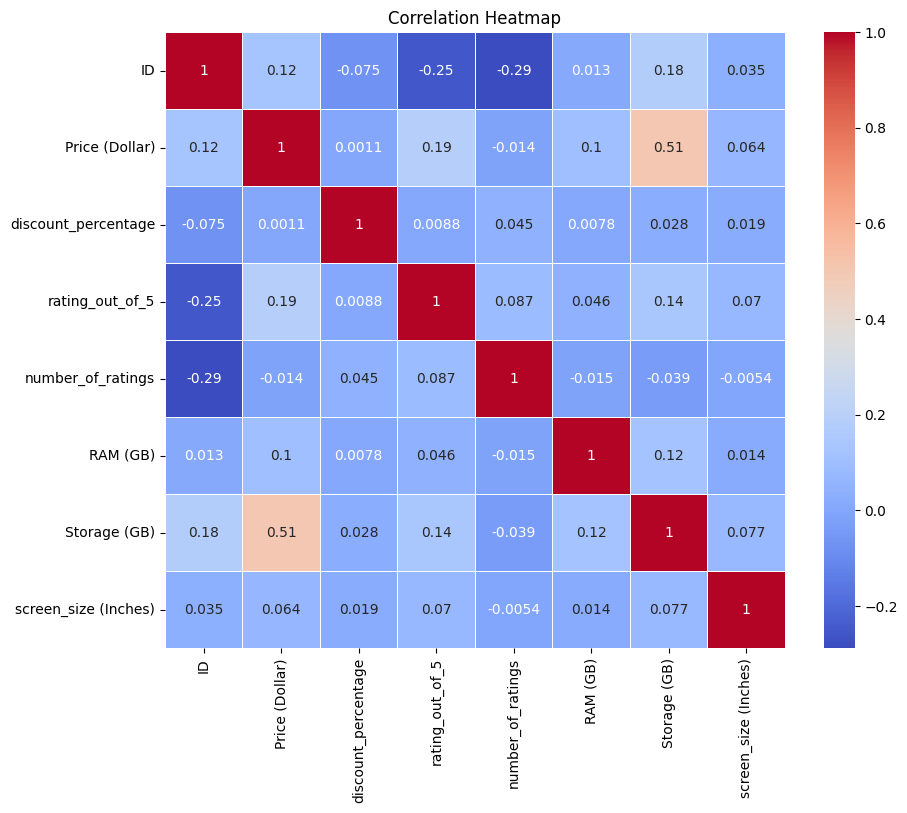

In [209]:
correlation_matrix = df_cleaned.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [210]:
correlation_with_target = correlation_matrix['rating_out_of_5'].sort_values(ascending=False)

In [211]:
correlation_with_target.head(10)

,rating_out_of_5
rating_out_of_5,1.000000
Price (Dollar),0.186412
Storage (GB),0.140021
number_of_ratings,0.087460
screen_size (Inches),0.070210
RAM (GB),0.045752
discount_percentage,0.008755
ID,-0.253175


In [212]:
unique_values_counts = df_cleaned[['brand', 'operating_system', 'cellular_technology', 'model_name']].nunique()

for column in ['brand', 'operating_system', 'cellular_technology', 'model_name']:
    if unique_values_counts[column] < 100:
        # One-Hot Encoding
        df_cleaned = pd.get_dummies(df_cleaned, columns=[column], prefix=[column], drop_first=True)
    else:
        # Frequency Encoding
        frequency_encoding(column)

In [213]:
df_cleaned.head()

,ID,product_name,product_link,image_link,Price (Dollar),discount_percentage,rating_out_of_5,number_of_ratings,brand,operating_system,RAM (GB),Storage (GB),screen_size (Inches),cellular_technology,model_name
0,1,"Apple iPhone XR, 64GB, Black - Unlocked (Renewed)",https://www.amazon.com/Apple-iPhone-XR-Fully-U...,https://m.media-amazon.com/images/I/717KHGCJ6e...,168.39,5.93,4.4,64918.0,0.055502,0.001925,3.0,64.0,6.10,0.000321,0.001925
1,2,"Apple iPhone 11, 64GB, Black - Unlocked (Renewed)",https://www.amazon.com/Apple-iPhone-11-64GB-Bl...,https://m.media-amazon.com/images/I/612kg3rGyY...,230.00,0.00,4.2,52613.0,0.055502,0.017004,4.0,64.0,6.10,0.445621,0.003850
2,3,"Apple iPhone 12, 64GB, Black - Fully Unlocked ...",https://www.amazon.com/Apple-iPhone-12-64GB-Bl...,https://m.media-amazon.com/images/I/41bIlvE1rd...,287.00,0.00,4.1,25403.0,0.055502,0.017004,4.0,64.0,6.10,0.002887,0.000642
3,4,"OnePlus Nord CE 2,​ 5G Unlocked Android Smartp...",https://www.amazon.com/OnePlus-Unlocked-Androi...,https://m.media-amazon.com/images/I/61+Q6Rh3OQ...,329.99,0.00,4.3,25133.0,0.023099,0.050690,8.0,128.0,6.43,0.229066,0.000321
4,5,"Apple iPhone XS, US Version, 64GB, Space Gray ...",https://www.amazon.com/Apple-iPhone-64GB-Space...,https://m.media-amazon.com/images/I/51I7GPdU6L...,182.00,0.00,4.2,21859.0,0.055502,0.001925,6.0,64.0,5.80,0.000642,0.000642


In [214]:
# 'Price (Dollar)', 'RAM (GB)', 'Storage (GB)', 'screen_size (Inches)', 'number_of_ratings','brand', 'operating_system', 'cellular_technology', 'model_name','rating_out_of_5'

In [215]:
X = df_cleaned[['RAM (GB)', 'Storage (GB)', 'rating_out_of_5', 'brand', 'operating_system','number_of_ratings','cellular_technology','model_name','brand','screen_size (Inches)','Price (Dollar)']]
y = df_cleaned['rating_out_of_5']

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [218]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR(),
    'GradientBoost': GradientBoostingRegressor(),
    'Adaboost': AdaBoostRegressor()
}

In [219]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: MSE = {mse}, R-squared = {r2*100}')

Linear Regression: MSE = 8.912611188795085e-31, R-squared = 100.0
Random Forest: MSE = 1.675320512820534e-05, R-squared = 99.99611633024806
SVM: MSE = 0.018822297854633543, R-squared = 95.6366803676776
GradientBoost: MSE = 1.529122560779193e-05, R-squared = 99.9964552412563
Adaboost: MSE = 0.004303753469585011, R-squared = 99.0023188373946


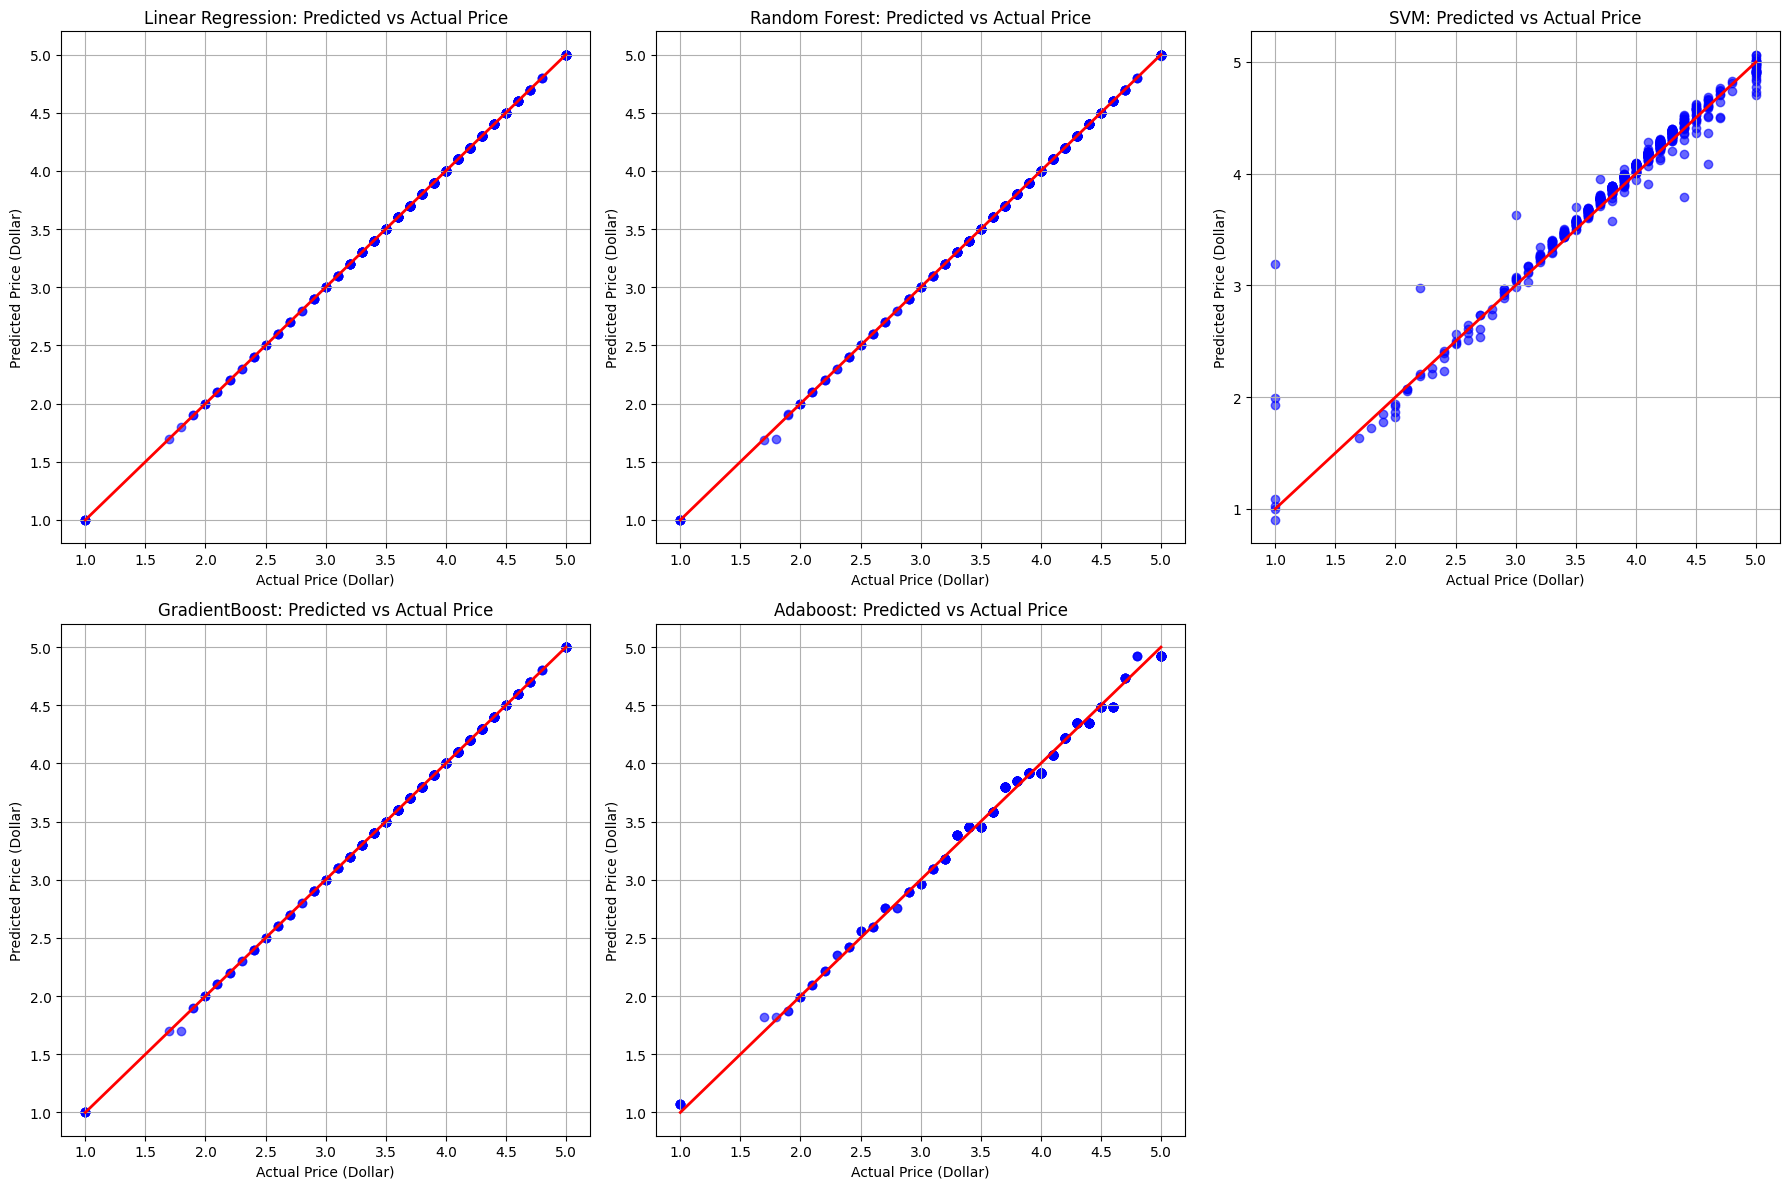

In [220]:
num_models = len(models)
num_cols = 3
num_rows = (num_models + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 6, num_rows * 6))

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    plt.subplot(num_rows, num_cols, idx + 1)

    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.title(f'{name}: Predicted vs Actual Price')
    plt.xlabel('Actual Price (Dollar)')
    plt.ylabel('Predicted Price (Dollar)')
    plt.grid(True)

plt.tight_layout()
plt.show()